In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from datetime import datetime

matplotlib.rc('font', family = 'Noto Sans CJK JP')
matplotlib.rc('axes', unicode_minus = False)
plt.style.use(['fivethirtyeight'])
import seaborn as sns



from scipy import stats
import scipy.stats
from scipy.stats import shapiro
from scipy.stats import bartlett, levene
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.tools.eval_measures import rmse

from sklearn.tree import export_graphviz

import graphviz
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering,KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from dask.diagnostics import ProgressBar
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, f1_score, roc_curve, auc, precision_score,recall_score


display(HTML("<style>.container { width:100% !important; }</style>"))

In [81]:
df = pd.read_csv('final_merged_dataset.csv')

In [82]:
df.head()

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395


In [83]:
#[Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Datetime,resist_target,N2_HMDS,pressure_HMDS,temp_HMDS,temp_HMDS_bake,spin1,spin2,spin3,photoresist_bake,temp_softbake,time_softbake,Line_CD,Resolution,Energy_Exposure,Thin F4,Thin F3,Thin F2,Thin F1,Temp_Etching,Source_Power,Selectivity,Flux60s,Flux90s,Flux160s,Flux480s,input_Energy,Temp_implantation,Furance_Temp,RTA_Temp,Target,total_count]

In [84]:
df.head()

,No_Die,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,...,Furance_Temp,RTA_Temp,count_ion,Target,Error_message,Wafer_map,chamber_total_count,chamber_path,defective,defective_chip_rate
0,NOLSM325131325,2,Oxidation,dry,1214.307948,O2,26.69,0.203,120,713.132,...,854.0,154,582,141,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0705
1,NOLSM326132326,2,Oxidation,dry,978.110792,O2,30.86,0.217,137,714.295,...,895.0,156,542,55,none,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...,2819,21122,0,0.0275
2,NOLSM327133327,2,Oxidation,dry,1176.019149,O2,31.07,0.218,116,710.114,...,898.0,152,550,96,none,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...,2847,21133,0,0.0480
3,NOLSM328134328,2,Oxidation,dry,933.442733,O2,31.04,0.196,143,710.617,...,879.0,155,582,105,none,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...,2907,21111,0,0.0525
4,NOLSM329135329,2,Oxidation,wet,1140.598752,H2O,31.37,0.215,76,711.632,...,882.0,155,542,79,none,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...,2819,21122,0,0.0395


In [85]:
df.Wavelength.value_counts()

436    608
405    556
365    494
Name: Wavelength, dtype: int64

In [86]:
categorical_variable = ['No_Die','Ox_Chamber','type','Vapor','photo_soft_Chamber','lithography_Chamber','UV_type','process', 'Etching_Chamber','Chamber_Num',
                        'Error_message', 'chamber_path', 'defective','Wafer_map']

## 범주형 변수 heatmap & chi2

In [87]:
df_cat = df[categorical_variable]

In [88]:
df_cat

,No_Die,Ox_Chamber,type,Vapor,photo_soft_Chamber,lithography_Chamber,UV_type,process,Etching_Chamber,Chamber_Num,Error_message,chamber_path,defective,Wafer_map
0,NOLSM325131325,2,dry,O2,1,1,I,Oxidation,1,1,none,21111,0,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
1,NOLSM326132326,2,dry,O2,1,1,H,Oxidation,2,2,none,21122,0,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 2 0 0 0 0 0 0 ...
2,NOLSM327133327,2,dry,O2,1,1,I,Oxidation,3,3,none,21133,0,[[0 0 0 0 0 0 0 0 0 0 1 2 1 1 1 2 0 0 0 0 0 0 ...
3,NOLSM328134328,2,dry,O2,1,1,G,Oxidation,1,1,none,21111,0,[[0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 2 0 0 0 0 0 0 ...
4,NOLSM329135329,2,wet,H2O,1,1,H,Oxidation,2,2,none,21122,0,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,NOLSM3081211,1,dry,O2,3,3,H,Oxidation,1,1,none,13311,0,[[0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 0 0 0 0 0 0 ...
1654,NOLSM8493212,1,wet,H2O,1,1,I,Oxidation,3,3,none,11133,0,[[0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 0 0 0 0 0 0 ...
1655,NOLSM8503213,1,wet,H2O,1,2,I,Oxidation,2,2,none,11222,0,[[0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 1 0 0 0 0 0 0 ...
1656,NOLSM8513214,1,wet,H2O,1,3,I,Oxidation,1,1,none,11311,0,[[0 0 0 0 0 0 0 0 0 0 2 1 2 2 2 1 0 0 0 0 0 0 ...


## 1. Oxidation type & Vapor

In [89]:
temp = df_cat[['No_Die','type','defective']];temp

,No_Die,type,defective
0,NOLSM325131325,dry,0
1,NOLSM326132326,dry,0
2,NOLSM327133327,dry,0
3,NOLSM328134328,dry,0
4,NOLSM329135329,wet,0
...,...,...,...
1653,NOLSM3081211,dry,0
1654,NOLSM8493212,wet,0
1655,NOLSM8503213,wet,0
1656,NOLSM8513214,wet,0


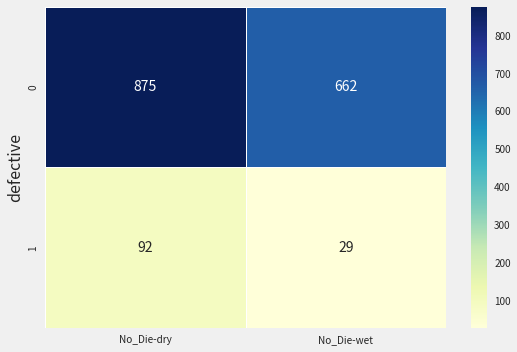

In [90]:
sns.heatmap(temp.pivot_table(temp, columns='type', index= 'defective', aggfunc='count'), annot=True, fmt='d', cmap= 'YlGnBu', linewidth=0.5)
plt.xlabel('')
plt.ylabel('defective',fontsize=16)
plt.show()

In [91]:
temp_for_chi2 = pd.DataFrame({'defective_0' : [875, 662], 'defective_1' : [92, 29]})

In [92]:
chi,pval,dof,expected = stats.chi2_contingency(temp_for_chi2.T)

print('chi-square test')
print('chi-sq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chi-sq: 16.065
p: 0.000


## 2. UV_type

In [93]:
temp = df_cat[['No_Die','UV_type','defective']];temp

,No_Die,UV_type,defective
0,NOLSM325131325,I,0
1,NOLSM326132326,H,0
2,NOLSM327133327,I,0
3,NOLSM328134328,G,0
4,NOLSM329135329,H,0
...,...,...,...
1653,NOLSM3081211,H,0
1654,NOLSM8493212,I,0
1655,NOLSM8503213,I,0
1656,NOLSM8513214,I,0


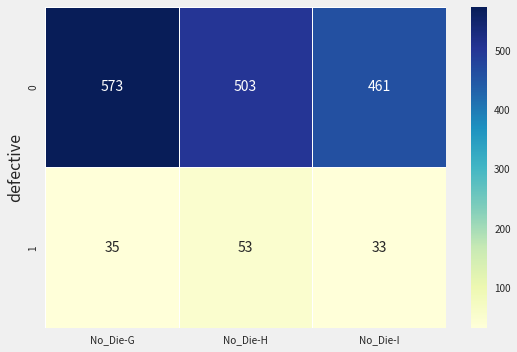

In [94]:
sns.heatmap(temp.pivot_table(temp, columns='UV_type', index= 'defective', aggfunc='count'), annot=True, fmt='d', cmap= 'YlGnBu', linewidth=0.5)
plt.xlabel('')
plt.ylabel('defective',fontsize=16)
plt.show()

In [95]:
temp_for_chi2 = pd.DataFrame({'defective_0' : [573, 503, 461], 'defective_1' : [35, 53, 33]})

In [96]:
chi,pval,dof,expected = stats.chi2_contingency(temp_for_chi2.T)

print('chi-square test')
print('chi-sq: {0:0.3f}'.format(chi))
print('p: {0:0.3f}'.format(pval))

chi-square test
chi-sq: 6.517
p: 0.038


In [97]:
expected

array([[563.62846803, 515.42340169, 457.94813028],
       [ 44.37153197,  40.57659831,  36.05186972]])